# A Notebook for Finding the Optimal Prior to Select with 1%, 3%, 5%, 10% extra bandwidth

In [1]:
import numpy as np
from numpy.fft import rfft,irfft
import matplotlib.pyplot as plt

import pfb
import conjugate_gradient as cg

Default npersave values are (these values are somewhat meaningless)

|prct            |1%  | 3% | 5% | 10% |
|----------------|----|----|----|-----|
|npersave optimal|7   |5   |4   |3    |


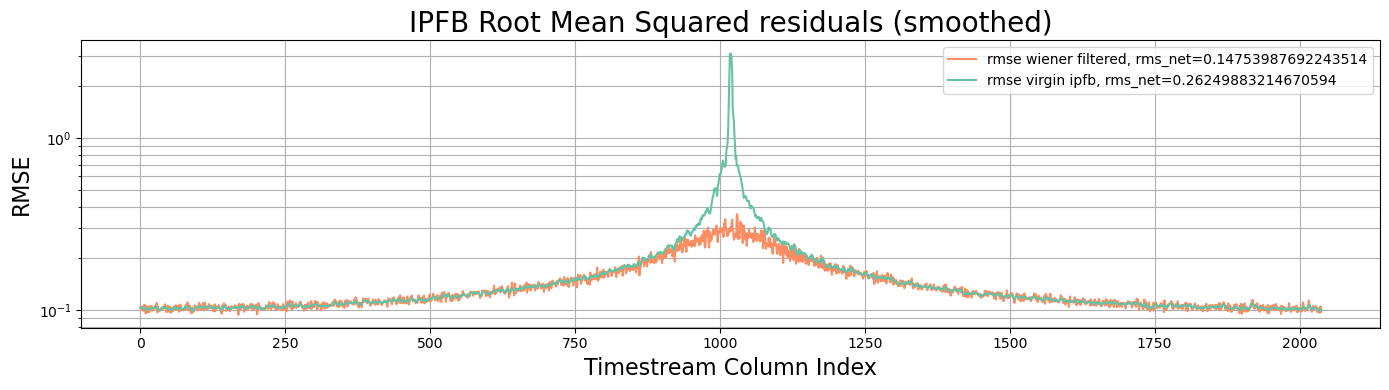

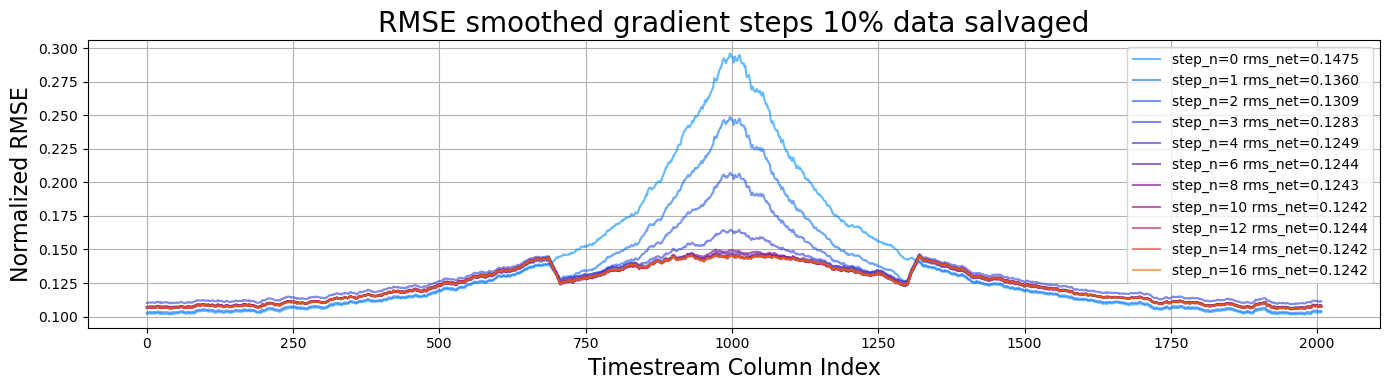

INFO: Conjugate Gradient descent completed.


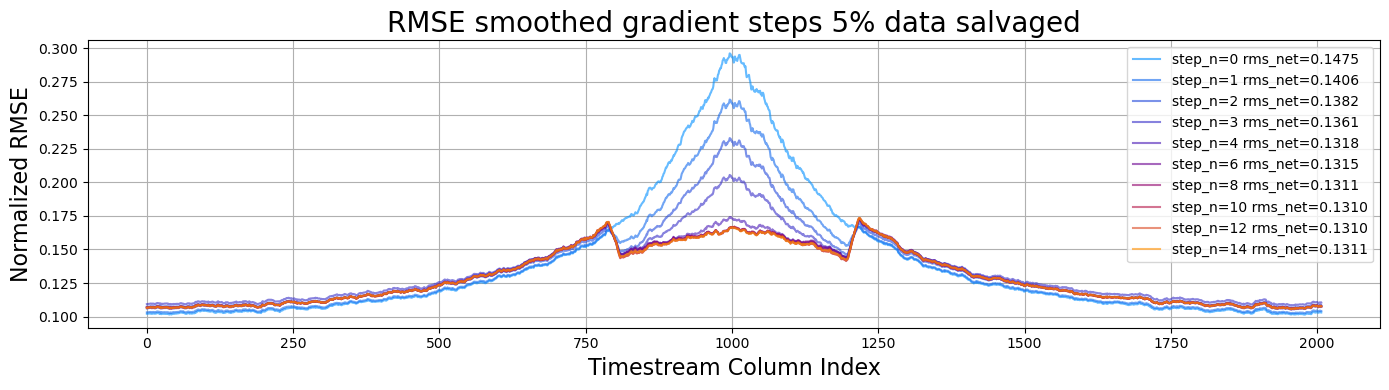

INFO: Conjugate Gradient descent completed.


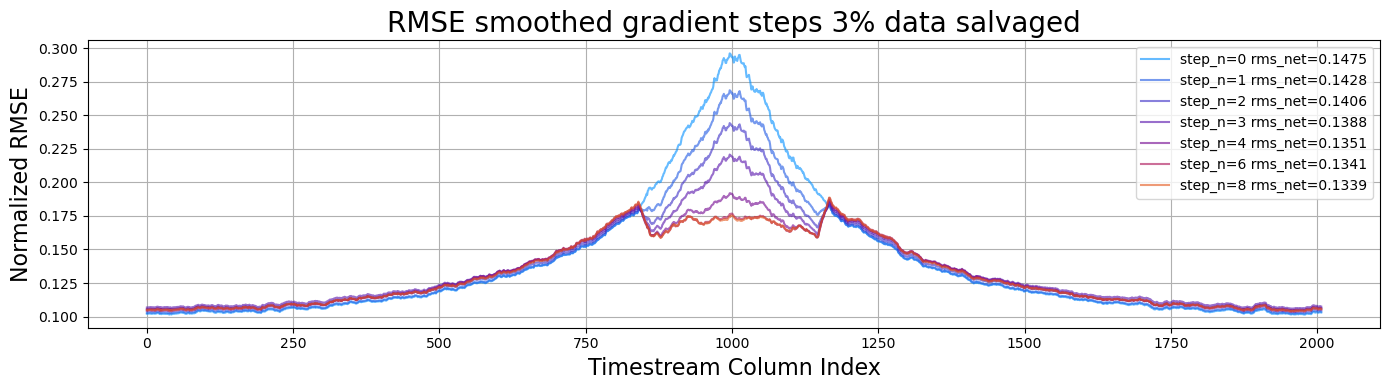

INFO: Conjugate Gradient descent completed.


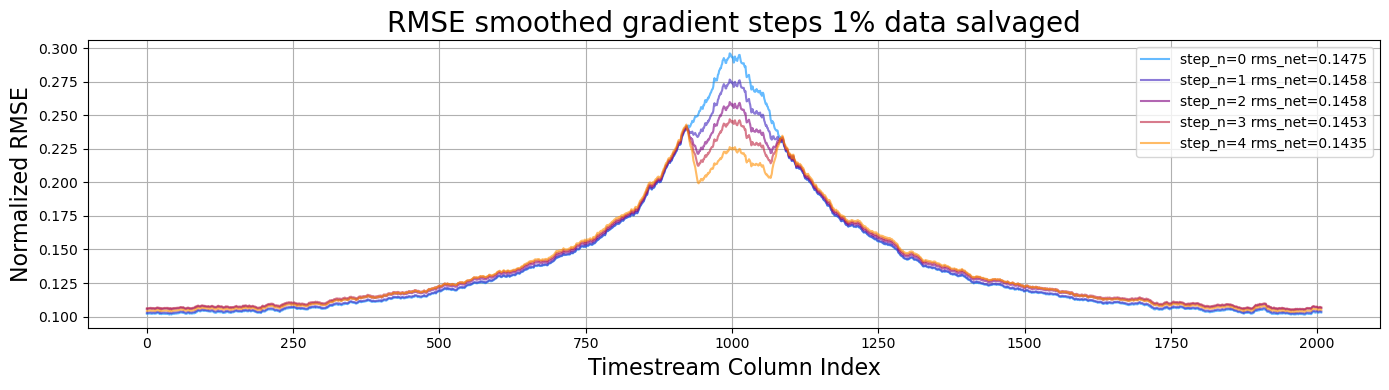

INFO: Conjugate Gradient descent completed.


In [28]:
n=1<<20
lblock=2048
x=np.random.randn(n)
x0, x0_wiener, x10, x5, x3, x1 = cg.conj_grad_one_three_five_perc(
    x=x,
    delta=0.343,
    k=n//lblock,
    lblock=lblock,
    verbose=True,
    wiener_thresh=0.1,
    npersave1=7,
    npersave3=5,
    npersave5=4,
    npersave10=3
)

    # npersave1=7,
    # npersave3=6,
    # npersave5=5,
    # npersave10=5


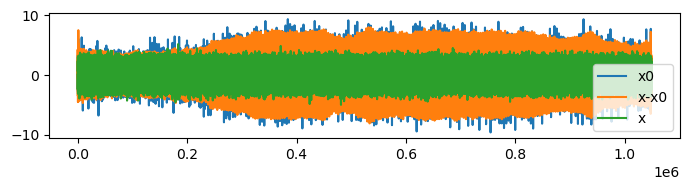

In [29]:
plt.figure(figsize=(7,2))
plt.plot(x0,label="x0")
plt.plot(x0-x,label='x-x0')
plt.plot(x,label="x")

plt.legend()
plt.tight_layout()
plt.show()


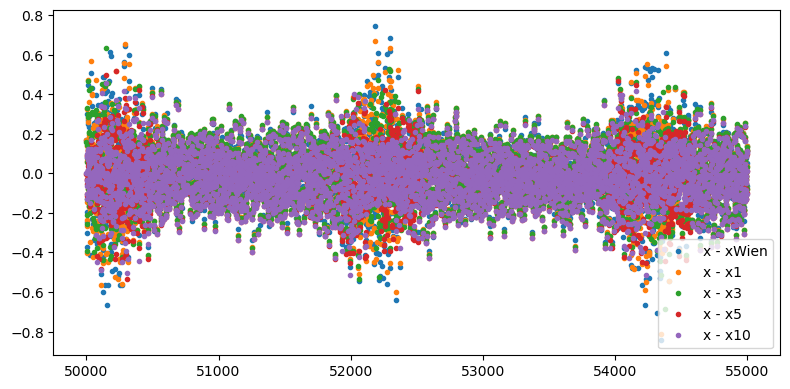

In [30]:
idxs = np.arange(50000,55000)
plt.figure(figsize=(8,4))
plt.plot(idxs,(x-x0_wiener)[idxs],'.',label="x - xWien",linewidth=0.3)
plt.plot(idxs,(x-x1)[idxs],'.',label='x - x1',linewidth=0.3)
plt.plot(idxs,(x-x3)[idxs],'.',label="x - x3",linewidth=0.3)
plt.plot(idxs,(x-x5)[idxs],'.',label="x - x5",linewidth=0.3)
plt.plot(idxs,(x-x10)[idxs],'.',label="x - x10",linewidth=0.3)

plt.legend()
plt.tight_layout()
plt.show()
